# Gauss-Legendre Quadrature

The first half of this notebook is largely based on the Lectures 8 and 11 in [Numerical Linear Algebra](https://www.amazon.com/Numerical-Linear-Algebra-Lloyd-Trefethen/dp/0898713617) and sets the background for numerical quadrature, in particular, Gauss-Legendre quadrature.

## Imports

In [34]:
import numpy as np
from plotly import __version__
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2
init_notebook_mode(connected=True)
np.set_printoptions(suppress=True)

## Helper functions

## Quick primer on Vandermonde matrices

## Legendre polynomials

Just as orthonormal vectors serve as a basis for some vector subspace, Legendre polynomials span the subspaces of polynomials.



<img src="img/legendre_polynomials.png" alt="legendre-polynomials" style="width: 75%"/>

### Discrete Legendre polynomials

In [35]:
import numpy.polynomial.legendre as leg

To use Legendre polynomials for a non-trivial example, we need to create a Vandermonde matrix by discretizing $[-1,1]$ and evaluating each of the monomials at the points.

In [36]:
x = np.linspace(-1,1,258).T
N = 4
A = np.vander(x,N,increasing=True)
 
A.shape

(258, 4)

Taking a look at the first 10 rows of $A$, we can see that the columns are the monomials $1,x,x^2,x^3$ evaluated for $x\in[-1,1]$.

In [37]:
A[:10,:]

array([[ 1.        , -1.        ,  1.        , -1.        ],
       [ 1.        , -0.9922179 ,  0.98449636, -0.97683491],
       [ 1.        , -0.9844358 ,  0.96911384, -0.95403036],
       [ 1.        , -0.9766537 ,  0.95385244, -0.93158351],
       [ 1.        , -0.9688716 ,  0.93871217, -0.90949156],
       [ 1.        , -0.96108949,  0.92369302, -0.88775165],
       [ 1.        , -0.95330739,  0.90879499, -0.86636098],
       [ 1.        , -0.94552529,  0.89401808, -0.8453167 ],
       [ 1.        , -0.93774319,  0.87936229, -0.824616  ],
       [ 1.        , -0.92996109,  0.86482763, -0.80425604]])

We can find the QR factorization of the Vandermonde matrix $A$, which gives us an approximation to the first four Legendre polynomials.

In [38]:
q, r = np.linalg.qr(A,'reduced')

q.shape, r.shape

((258, 4), (4, 4))

We have to modify the discrete polynomials so that for every Legendre polynomial $P_k(1)=1$.

This is simply a problem of rescaling each of the discrete Legendre polynomials by dividing all the values of a given order Legendre polynomial by the current value of $P_k(1)$.

In [39]:
q = q @ np.diag(1 / q[-1,:])

q.shape

(258, 4)

By plotting the discrete Legendre polynomials we just obtained with the analytical values for the first four Legendre polynomials, we can see that they are very similar.

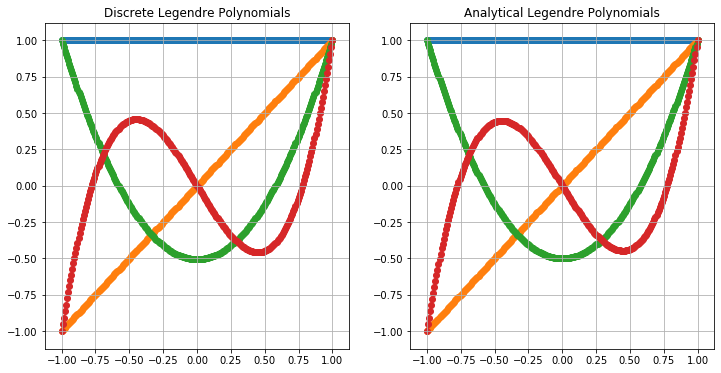

In [40]:
plt.figure(figsize=(12,6));

# Plot discrete Legendre polynomial values
plt.subplot(1,2,1)
[plt.scatter(x,q[:,i]) for i in range(N)];
plt.title('Discrete Legendre Polynomials')
plt.grid(True)

# Plot analytical Legendre polynomial values
plt.subplot(1,2,2)
c = np.eye(N)
[plt.scatter(x,leg.legval(x, c[i])) for i in range(N)];
plt.title('Analytical Legendre Polynomials')
plt.grid(True)

plt.show();

## Polynomial data-fitting

### Polynomial interpolation

One of the most obvious applications of Legendre polynomials is to determine the coefficients for some arbitrary polynomial $p(x)$:

$$ p(x)=c_0 + c_1x + x_2x^2 + \dots + c_{m-1}x^{m-1} $$

Before going deeper into the math, let's see how closely we can fit a given polynomial:

$$ y(x) = 5x^3 + 2x^2 + 4x - 2 $$

To do so, we will first sample the polynomial at 3 discrete points $x_i$.

In [41]:
N = 3
xi = np.linspace(-1,1,N)
yi = 5 * xi ** 3 + 2 * xi ** 2 + 4 * xi - 2

xi, yi

(array([-1.,  0.,  1.]), array([-9., -2.,  9.]))

Now, we can see what the fitting thinks the coefficients of the polynomial $p(x)$ are:

In [42]:
a = np.vander(xi,N,increasing=True)
c = np.linalg.solve(a,yi)

c

array([-2.,  9.,  2.])

Comparing $p(x)$ and $y(x)$, we see that $p(x)$ is a quadratic whereas $y(x)$ is a cubic function.

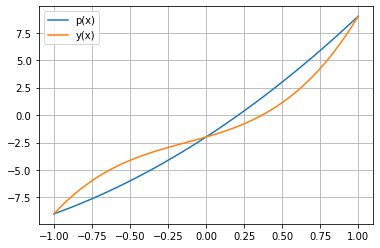

In [48]:
x = np.linspace(-1,1)
p = c[0] + c[1] * x + c[2] * x ** 2
y = 5 * x ** 3 + 2 * x ** 2 + 4 * x - 2

plt.plot(x,p);
plt.plot(x,y);
plt.grid(True);
plt.legend(('p(x)','y(x)'));

We can have $p(x)$ perfectly match $y(x)$ by simply adding one more column to the Vandermonde matrix.

In [57]:
N = 4
xi = np.linspace(-1,1,N)
yi = 5 * xi ** 3 + 2 * xi ** 2 + 4 * xi - 2

a = np.vander(xi,N,increasing=True)
c = np.linalg.solve(a,yi)

The plot seems to only show $y(x)$ but that is because the two lines are overlapping.

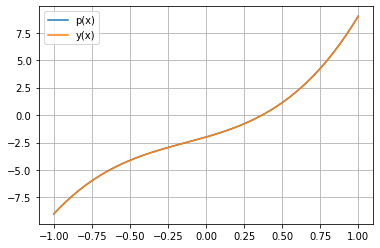

In [58]:
x = np.linspace(-1,1)
p = c[0] + c[1] * x + c[2] * x ** 2 + c[3] * x ** 3
y = 5 * x ** 3 + 2 * x ** 2 + 4 * x - 2

plt.plot(x,p);
plt.plot(x,y);
plt.grid(True);
plt.legend(('p(x)','y(x)'));

In any case, to perfectly calculate the coefficients of a polynomial $p(x)$ of order $m-1$, we need at most $m$ points. If more than $m$ points are used, $c_i=0$ for $i>m-1$.

array([-2.,  4.,  2.,  5., -0.,  0.])

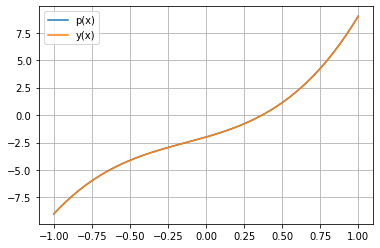

In [65]:
N = 6
xi = np.linspace(-1,1,N)
yi = 5 * xi ** 3 + 2 * xi ** 2 + 4 * xi - 2

a = np.vander(xi,N,increasing=True)
c = np.linalg.solve(a,yi)

x = np.linspace(-1,1)
p = c[0] + c[1] * x + c[2] * x ** 2 + c[3] * x ** 3 + c[4] * x ** 4
y = 5 * x ** 3 + 2 * x ** 2 + 4 * x - 2

plt.plot(x,p);
plt.plot(x,y);
plt.grid(True);
plt.legend(('p(x)','y(x)'));

c

The problem with polynomial interpolation is that they can only readlly calculate the coefficients for polynomials. With any sort of data, it's improbable that it fits perfectly to a polynomial.

One way we can better capture the trend in data is to use a lower-order polynomial.

### Polynomial least squares fitting

Interactive figure demonstrating the difference between polynomial interpolation and polynomial least squares fitting.

With a little bit of playing around, it becomes obvious that polynomial least squares fitting is superior as it is able to capture the behavior of the data without being heavily affected by perturbations.

## Numerical quadrature

## Resources

[Orthogonal Polynomials](http://web.cs.iastate.edu/~cs577/handouts/orthogonal-polys.pdf)